
# Liver Disease Prediction

#### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [ ]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# Reading Dataset:
dataset = pd.read_csv("/content/Liver_data.csv")
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Last 5 records:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
# Shape of dataset:
dataset.shape

(583, 11)

In [ ]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


- 'Albumin_and_Globulin_Ratio' feature contain 4 NaN values.

In [ ]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(dataset['Albumin_and_Globulin_Ratio'].median())
print(dataset['Albumin_and_Globulin_Ratio'].mean())

0.93
0.9470639032815197


In [ ]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [ ]:
# Datatypes:
dataset.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [ ]:
# Description:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


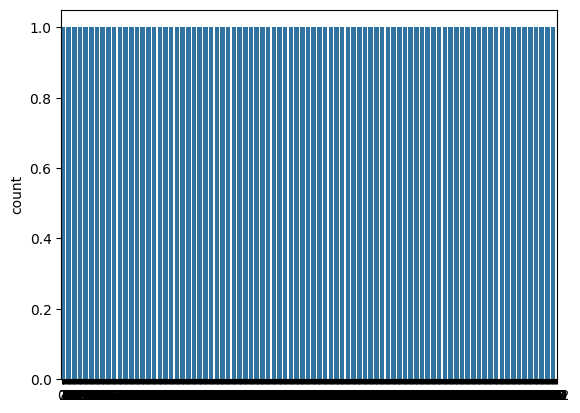

In [ ]:
# Target feature:
print("Liver Disease Patients      :", dataset['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", dataset['Dataset'].value_counts()[2])

# Visualization:
sns.countplot(dataset['Dataset'])
plt.show()

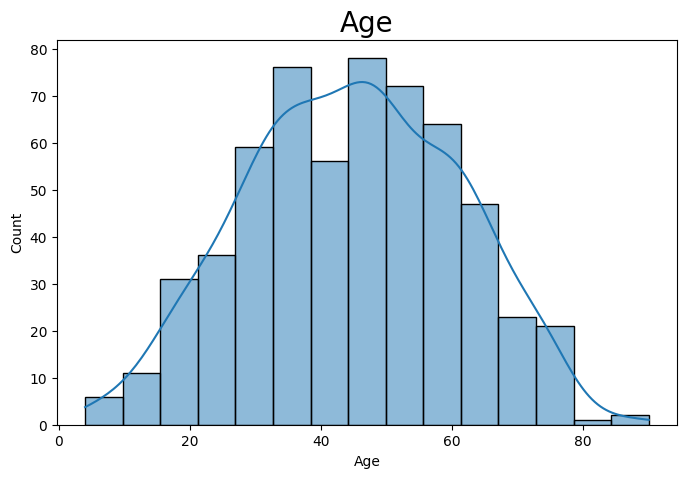

In [ ]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(dataset['Age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<ipython-input-17-011e08a8d4e7>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Male   :", dataset['Gender'].value_counts()[0])
<ipython-input-17-011e08a8d4e7>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Female :", dataset['Gender'].value_counts()[1])


Total Male   : 441
Total Female : 142


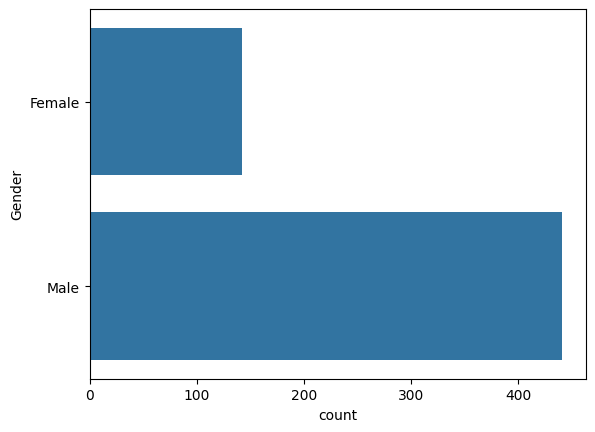

In [ ]:
# Gender feature:
print("Total Male   :", dataset['Gender'].value_counts()[0])
print("Total Female :", dataset['Gender'].value_counts()[1])

# Visualization:
sns.countplot(dataset['Gender'])
plt.show()

In [ ]:
# Printing How many Unique values present in each feature:
for feature in dataset.columns:
    print(feature,":", len(dataset[feature].unique()))

Age : 72
Gender : 2
Total_Bilirubin : 113
Direct_Bilirubin : 80
Alkaline_Phosphotase : 263
Alamine_Aminotransferase : 152
Aspartate_Aminotransferase : 177
Total_Protiens : 58
Albumin : 40
Albumin_and_Globulin_Ratio : 69
Dataset : 2


In [ ]:
# Label Encoding
dataset['Gender'] = np.where(dataset['Gender']=='Male', 1,0)

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


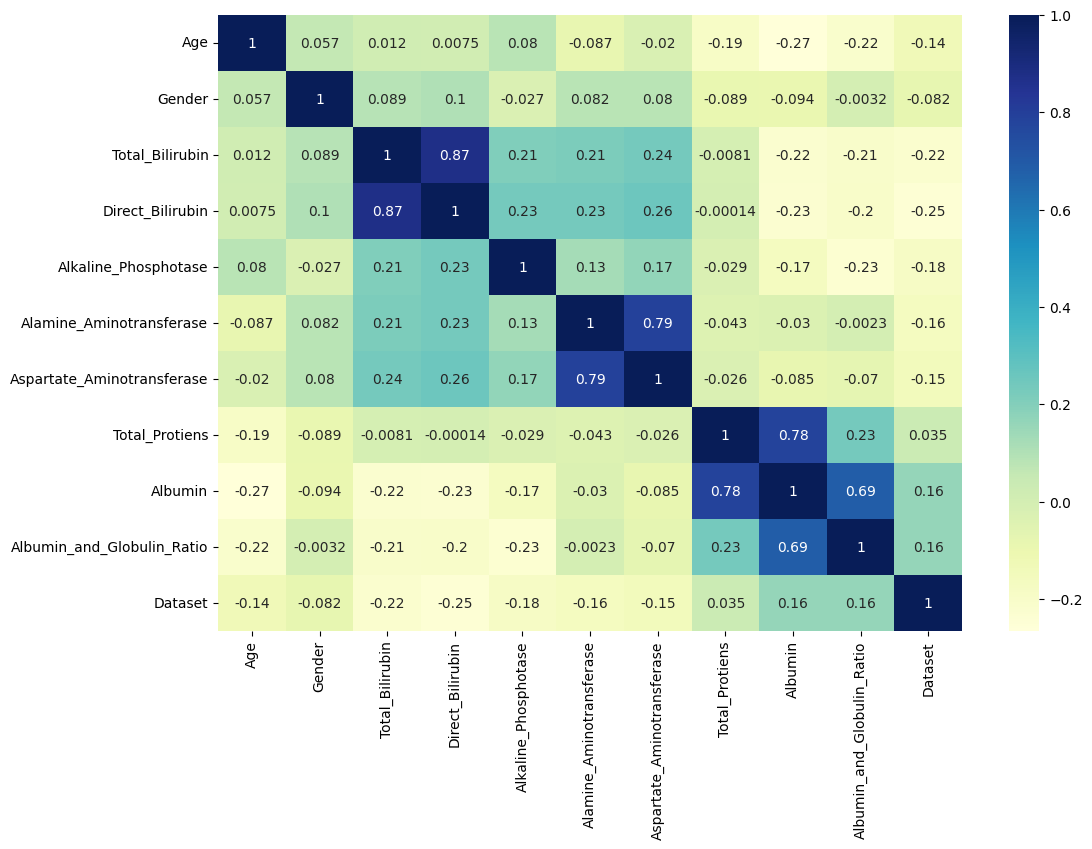

In [ ]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### There is Multi-Collinearity found on our dataset.

In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

1. Multicollinearity betwwen **'Total_Bilirubin'** and **'Direct_Bilirubin'** is **0.87%**
2. Multicollinearity betwwen **'Alamine_Aminotransferase'** and **'Aspartate_Aminotransferase' **is **0.79%**
3. Multicollinearity betwwen **'Total_Protiens'** and **'Albumin'** is **0.78%**
4. Multicollinearity betwwen **'Albumin'** and **'Albumin_and_Globulin_Ratio'** is **0.69%**

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.
Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them
and other independent feature has less multicollinearity, less than 0.80% So we keep that feature.

In [ ]:
# Droping 'Direct_Bilirubin' feature:
dataset = dataset.drop('Direct_Bilirubin', axis=1)

In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<ipython-input-25-55135eb50980>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Albumin'])


<Axes: xlabel='Albumin', ylabel='Density'>

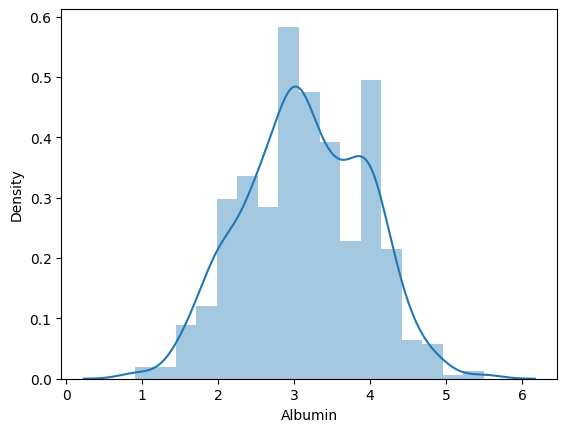

In [ ]:
sns.distplot(dataset['Albumin'])

In [ ]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=dataset['Total_Protiens'].mean() + 3* dataset['Total_Protiens'].std()
lower_boundary=dataset['Total_Protiens'].mean() - 3* dataset['Total_Protiens'].std()

print(dataset['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.483190394511149
3.22683594244075
9.739544846581548


In [ ]:
##### Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=dataset['Albumin'].mean() + 3* dataset['Albumin'].std()
lower_boundary=dataset['Albumin'].mean() - 3* dataset['Albumin'].std()

print(dataset['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.141852487135506
0.7552960692434247
5.528408905027587


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = dataset.Total_Bilirubin.quantile(0.75)-dataset.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [ ]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = dataset.Alkaline_Phosphotase.quantile(0.75) - dataset.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-192.0
665.5


<ipython-input-29-f468c19b6102>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '665.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge


In [ ]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = dataset.Alamine_Aminotransferase.quantile(0.75) - dataset.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-89.5
173.0


In [ ]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = dataset.Aspartate_Aminotransferase.quantile(0.75) - dataset.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-161.0
273.0


In [ ]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = dataset.Albumin_and_Globulin_Ratio.quantile(0.75) - dataset.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [ ]:
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90,1
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74,1
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89,1
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00,1
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40,1


In [ ]:
# Description after deal with outliers by IQR:
dataset.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,2.249400,266.389365,53.399657,73.041166,6.483190,3.141852,0.945403,1.286449
std,16.189833,0.429603,2.382344,145.665460,46.059536,73.549864,1.085451,0.795519,0.310942,0.452490
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,8.000000,665.500000,173.000000,273.000000,9.600000,5.500000,2.300000,2.000000


In [ ]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
# top 5 records of Independent features:
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40


In [ ]:
# top 5 records of dependent features:
y.head()

,Dataset
0,1
1,1
2,1
3,1
4,1


In [ ]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [ ]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 416, 2: 167})
After SMOTE  :  Counter({1: 388, 2: 388})


In [ ]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(543, 9)
(233, 9)


In [ ]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
5,Aspartate_Aminotransferase,3368.743077
3,Alkaline_Phosphotase,2385.790640
4,Alamine_Aminotransferase,1717.348297
2,Total_Bilirubin,127.476411
0,Age,64.315174
7,Albumin,3.053371
8,Albumin_and_Globulin_Ratio,1.704602
1,Gender,0.964518
6,Total_Protiens,0.129627


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

In [ ]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8540772532188842
[[ 90  23]
 [ 11 109]]
              precision    recall  f1-score   support

           1       0.89      0.80      0.84       113
           2       0.83      0.91      0.87       120

    accuracy                           0.85       233
   macro avg       0.86      0.85      0.85       233
weighted avg       0.86      0.85      0.85       233



In [ ]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7553648068669528
[[82 31]
 [26 94]]
              precision    recall  f1-score   support

           1       0.76      0.73      0.74       113
           2       0.75      0.78      0.77       120

    accuracy                           0.76       233
   macro avg       0.76      0.75      0.75       233
weighted avg       0.76      0.76      0.76       233



In [ ]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8283261802575107
[[ 89  24]
 [ 16 104]]
              precision    recall  f1-score   support

           1       0.85      0.79      0.82       113
           2       0.81      0.87      0.84       120

    accuracy                           0.83       233
   macro avg       0.83      0.83      0.83       233
weighted avg       0.83      0.83      0.83       233



####  RandomizedSearchCV

In [ ]:
# Importing RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

# Number of features to consider at every split:
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree:
max_depth = [int(x) for x in np.linspace(100, 100,20)]

# Minimum number of samples required to split a node:
min_samples_split = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

In [ ]:
# Create the random grid:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'criterion': ['entropy', 'gini']}


In [ ]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose = 2,
                               random_state = 0, n_jobs = -1)

# fit the randomized model:
rf_randomcv.fit(X_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
92 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 12,
                                                              14, 16, 18, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=0, verbose=2)

In [ ]:
# Best parameter of RandomizedSearchCV:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy'}

In [ ]:
# Creating model using best parameter of RandomizedSearchCV:
RandomForest_RandomCV = RandomForestClassifier(criterion = 'entropy', n_estimators = 2000, max_depth = 100, max_features = 'log2',
                                               min_samples_split = 3, min_samples_leaf = 2)
RandomForest_RandomCV = RandomForest_RandomCV.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest_RandomCV.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8497854077253219
[[ 88  25]
 [ 10 110]]
              precision    recall  f1-score   support

           1       0.90      0.78      0.83       113
           2       0.81      0.92      0.86       120

    accuracy                           0.85       233
   macro avg       0.86      0.85      0.85       233
weighted avg       0.86      0.85      0.85       233



#### GridSearchCV

In [ ]:
# Importing GridSearchCV:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Best parameter:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy'}

In [ ]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'max_depth': [rf_randomcv.best_params_['max_depth']-50,
                  rf_randomcv.best_params_['max_depth'],
                 rf_randomcv.best_params_['max_depth']+50],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf']-1,
                         rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+1],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 50,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 50]
}

print(param_grid)

{'criterion': ['entropy'], 'max_features': ['log2'], 'max_depth': [50, 100, 150], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4], 'n_estimators': [1950, 2000, 2050]}


In [ ]:
# Fit the grid_search to the data:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=2 , n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [50, 100, 150],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1950, 2000, 2050]},
             verbose=2)

In [72]:
# Best Parameter of GridSearchCV:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2050}

In [73]:
# Creating model using best parameter of GridSearchCV:
RandomForest_gridCV = RandomForestClassifier(criterion='entropy', n_estimators=1950, max_depth=150, max_features='log2',
                                             min_samples_split=2, min_samples_leaf=1)
RandomForest_gridCv = RandomForest_gridCV.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest_gridCV.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8497854077253219
[[ 88  25]
 [ 10 110]]
              precision    recall  f1-score   support

           1       0.90      0.78      0.83       113
           2       0.81      0.92      0.86       120

    accuracy                           0.85       233
   macro avg       0.86      0.85      0.85       233
weighted avg       0.86      0.85      0.85       233



#### - We saw that after doing RandomizedSearchCV and GridSearchCV, Our accuracy, Precision, Recall, f1-Score doesn't increase.

In [75]:
import pickle

In [77]:
pickle.dump(RandomForest_gridCV, open('Liver2.pkl', 'wb'))